# Entregable N°2 - Modelos de Aprendizaje Automático

---
**Integrante 1:** Fernández, Silvia.

e-mail: silvia2484@gmail.com

**Integrante 2:** Perez, Micaela    
e-mail:  mperez@estudiantes.unsam.edu.ar

**Título del entregable:** Analisis del fenómeno delictual en la región PBA entre los años 2017 y 2023.


Enlace al conjunto de datos original: https://www.datos.gob.ar/dataset/seguridad-snic---provincial-estadisticas-criminales-republica-argentina-por-provincias



## Preprocesamiento

El objetivo inicial de este trabajo es analizar la evolución de los delitos en la región del AMBA para, a partir de ello, predecir su tendencia mediante un modelo. Dado que la mayor parte de los datos provienen de la Provincia de Buenos Aires (PBA), se decidio centrarnos en esta región, que incluye el GBA y el interior, por su diversidad socioeconómica y problemática. Hasta esta entrega, se logro delimitar el área de estudio, explorar las variables disponibles y comenzar a construir un modelo predictivo que permita describir el comportamiento delictivo y su posible evolución a lo largo del tiempo.

EL conjunto de datos cuenta con **5396** instancias y **20** variables.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plts

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/Shareddrives/lcd- Silvia-Mica/IAA/Tp/bs_as_final.csv',sep=';')

Mounted at /content/drive


## Pre-procesamiento

* Se asignó un valor entero referente a cada grupo de delito para poderver la correlacion con nuestra variable target, ya  que es numérica.
* Se eliminaron los NAN debido a que su cantidad era poco significativa frente a la cantidad de valores. También, se dedujo por la forma en que se  calcula la tasa para cada una de estas variables, que la mayoría de estos tenian ingresos erroneos.
* Se realizaron boxplots para ver como se distribuyen los datos por la tasa_hechos y según su delito. La idea fue ver bien los outliers. Se pudo observar que el conjunto de datos es bastante disperso, por cada delito.
* Decidimos no eliminar los outliers a partir de lo visto en los boxplot.  

## Benchmark

Realizamos un modelo de referencia para fijar un desempeño mínimo con el cual comparar a los sucesivos modelos, de creciente complejidad. Se relizó el modelo de Regresion Lineal.

Elegimos:
* Variable target : tasa_victimas
* Atributo : tasa_hechos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df[['tasa_hechos']]
y = df['tasa_victimas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['tasa_hechos'] = scaler.fit_transform(X_train[['tasa_hechos']])
X_test_scaled['tasa_hechos'] = scaler.transform(X_test[['tasa_hechos']])

modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

y_pred = modelo.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: 0.8931
MSE: 2788.9805
RMSE: 52.8108


El **desempeño** del benchmark fue bastante significante, esto se debe a la correlación existente entre ambas variables, la cual, es alta. La variabilidad de la tasa_victimas es explicada por la variable tasa_hechos.

## Modelo 1

Para el primer modelo decidimos agregar un atributo más y aumentar la complejidad.

**Eleccion de los atributos**

Se utilizaron los atributos "tasa_hechos" y "grupo_delito_id" ya que tienen una correlación baja entre ellos(0.09). Asi mismo tiene la siguiente correlación con la target.
* tasa_hecho vs tasa_victimas = 0.97
* grupo_delito_id vs tasa_victimas = 0.13

**Evaluación del modelo**

* Se separó el conjunto de datos usando la técnica train_test_split, con un 80% de los datos para entrenamiento y 20% para la evaluación.
* Utilizamos validación cruzada para observar el desempeño del modelo en el conjunto de entrenamiento.
* Se realizó el escalado en el modelo para que no modifique las variables categóricas numéricas, en este caso , grupo_delito_id.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = df[['tasa_hechos', 'grupo_delito_id']]
y = df['tasa_victimas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['tasa_hechos'] = scaler.fit_transform(X_train[['tasa_hechos']])
X_test_scaled['tasa_hechos'] = scaler.transform(X_test[['tasa_hechos']])

modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

y_pred = modelo.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

R-squared: 0.8953
MSE: 2730.7474
RMSE: 52.2566


No hay cambios significantes del modelo 1 con el modelo de referencia como lo indica el R^2.
Tomamos tasa_victimas y vemos su resumen de métricas para comprender como está compuesto su rango, ya que el RMSE da un poco más de 52. Este parece ser adecuado debido a que nuestra variable tiene un alto desvío y los datos estan bastante dispersos.

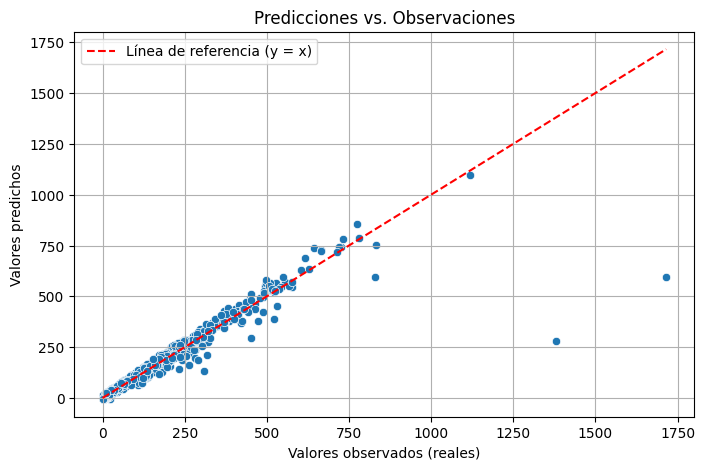

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_pred_vs_real = pd.DataFrame({
    'y_real': y_test,
    'y_pred': y_pred})

plt.figure(figsize=(5, 3))
sns.scatterplot(x='y_real', y='y_pred', data=df_pred_vs_real)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea de referencia (y = x)')
plt.xlabel('Valores observados (reales)')
plt.ylabel('Valores predichos')
plt.title('Predicciones vs. Observaciones')
plt.legend()
plt.grid(True)
plt.show()

Según el gráfico de las obersevaciones vs predicciones, se puede observar el buen desempeño del modelo 1 ya que los valores predichos se asimilan a los valores observados. Notamos algunos outliers, esto es esperable debido a la dispersión de los datos anteriormente observada.  

**Residuos del modelo 1**

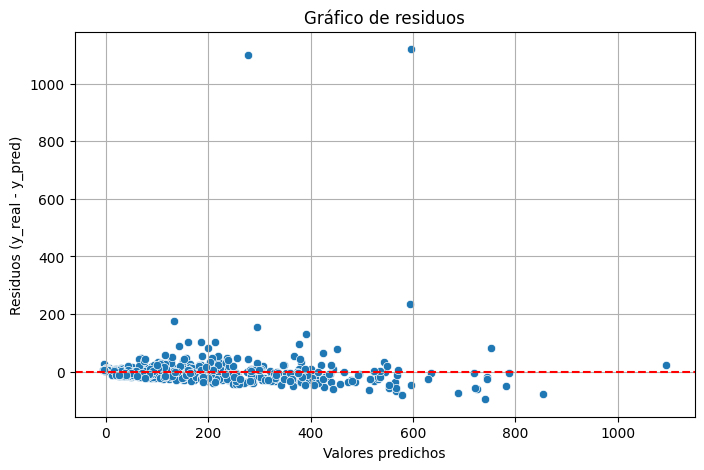

In [ ]:
residuos = y_test - y_pred

df_residuos = pd.DataFrame({
    'y_real': y_test,
    'y_pred': y_pred,
    'residuo': residuos
})

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos (y_real - y_pred)')
plt.title('Gráfico de residuos')
plt.grid(True)
plt.show()


El gráfico muestra a los residuos ubicados en su mayoría, cercano a cero. Esto indica una fuerte precisión.


**Visualizar el modelo**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

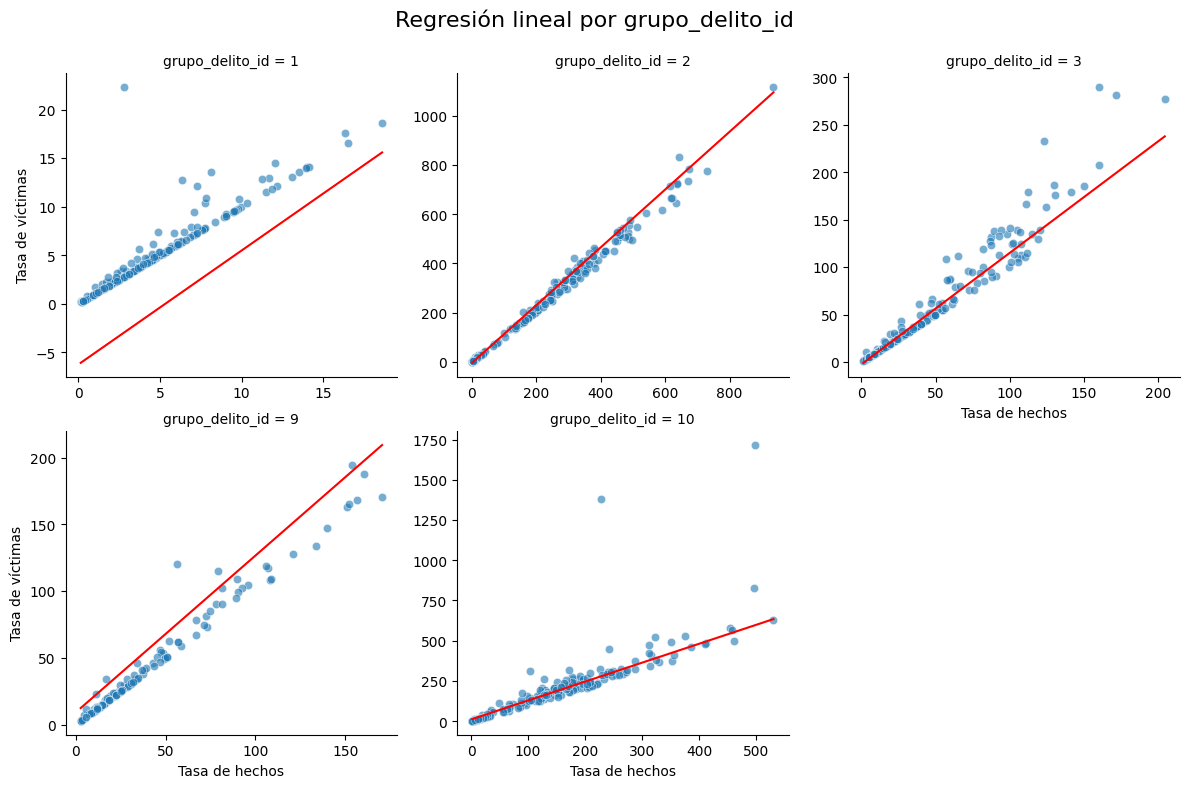

In [ ]:
df_resultados = X_test.copy()
df_resultados['y_real'] = y_test
df_resultados['y_pred'] = y_pred

df_resultados['grupo_delito_id'] = df_resultados['grupo_delito_id'].astype(int)

#g = sns.FacetGrid(df_resultados, col="grupo_delito_id", col_wrap=3, height=4, sharex=True, sharey=True)
g = sns.FacetGrid(df_resultados, col="grupo_delito_id",col_wrap=3, height=4, sharex=False, sharey=False)

g.map_dataframe(sns.scatterplot, x="tasa_hechos", y="y_real", alpha=0.6)

g.map_dataframe(sns.lineplot, x="tasa_hechos", y="y_pred", color="red")

g.set_axis_labels("Tasa de hechos", "Tasa de víctimas")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Regresión lineal por grupo_delito_id", fontsize=16)
plt.show()


Para la visualización del modelo 1, se proyectó sobre los datos según el grupo de crimen. Solo en el caso de  grupo_delito_id = 1, la recta no se asimila correctamente a los datos. Por lo que el modelo no estaría explicando bien el comportamiento de este delito.

## Modelo 2

Se probaron distintos modelos, agregando cada vez más atributos, para determinar el que mejor ajuste a todo el conjunto de los datos.

Modelos :
* Modelo 3 atributos
 * tasa_hechos:
 * tasa_victimas_fem
 * grupo_delito_id

* Modelo 4 atributos
 * tasa_hechos:
 * tasa_victimas_fem
 * tasa_victimas_masc
 * grupo_delito_id

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Conjuntos de atributos
atributos = {
    'Modelo 1': ['tasa_hechos', 'grupo_delito_id'],
    'Modelo 2': ['tasa_hechos', 'tasa_victimas_fem', 'grupo_delito_id'],
    'Modelo 3': ['tasa_hechos', 'tasa_victimas_fem', 'tasa_victimas_masc',
                 'grupo_delito_id']
}

y = df['tasa_victimas']

resultados = []

for nombre, cols in atributos.items():
    X = df[cols]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados.append({
        'Modelo': nombre,
        'Atributos': cols,
        'MSE': round(mse, 3),
        'R2': round(r2, 3)
    })

In [ ]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

     Modelo                                          Atributos       MSE  \
0  Modelo 1                     [tasa_hechos, grupo_delito_id]  2730.747   
1  Modelo 2  [tasa_hechos, tasa_victimas_fem, grupo_delito_id]  1395.347   
2  Modelo 3  [tasa_hechos, tasa_victimas_fem, tasa_victimas...    59.075   

      R2  
0  0.895  
1  0.947  
2  0.998  


Por el MSE y el r2 de 0.998, se determinó que el modelo 3  explica casi toda la varianza de la variable objetivo.

El paso siguiente es hacer validación cruzada con el modelo 3

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X = df[['tasa_hechos', 'tasa_victimas_fem', 'tasa_victimas_masc', 'grupo_delito_id']]
y = df['tasa_victimas']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')
mse_scores = -cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error')  # se multiplica por -1 porque sklearn devuelve el negativo
rmse_scores = np.sqrt(mse_scores)

print("Resultados de Validación Cruzada (Modelo 3):")
print(f"R² promedio: {r2_scores.mean():.4f} (± {r2_scores.std():.4f})")
print(f"MSE promedio: {mse_scores.mean():.4f}")
print(f"RMSE promedio: {rmse_scores.mean():.4f}")


Resultados de Validación Cruzada (Modelo 3):
R² promedio: 0.9979 (± 0.0002)
MSE promedio: 51.8662
RMSE promedio: 7.1883


Notamos que el desempeño del modelo en CV es consistente en todo el conjunto de datos.

Para finalizar analizamos sus coeficientes

In [ ]:
pipeline.fit(X, y)
coeficientes = pipeline.named_steps['regressor'].coef_
intercepto = pipeline.named_steps['regressor'].intercept_

# Crear un DataFrame para mostrarlos de forma ordenada
df_coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': coeficientes
})

print(df_coeficientes)
print(f"\nIntercepto: {intercepto:.4f}")

             Variable  Coeficiente
0         tasa_hechos    10.595110
1   tasa_victimas_fem    80.839309
2  tasa_victimas_masc    75.149060
3     grupo_delito_id     0.210442

Intercepto: 96.2142


Según los coeficientes, podemos decir que:
* Por cada incremento de unidad de la hay un incremento de al menos 10.5 en la tasa_hechos.
*Particularmente esto resulta más notorio observando la tasa de victimas masculina y femenina, siendo un incremento levemente mayor en el conjunto femenino.
*Por cada grupo delito no hay tanta variación. Solo incrementa un 0.2 por unidad de la variable.

## Conclusión

Los resultados obtenidos demuestran que el mejor modelo es el 3 debido a R^2 promedio de 0.9979 . En cambio el modelo 1 obtuvo un R^2 de 0.8953. Se elige entonces el modelo 3 para determinar como varía la tasa de hechos a lo largo del tiempo y predecir cuanto va a modificarse esta misma a futuro.
Se considera también que la variabilidad de la tasa_victimas depende más del hecho cometido y del género de las víctimas.

## Continuacion

Se podria investigar más sobre que tipo de delitos es más propenso que le sucede al genero masculino o al feminimo, ya que se muestra que el genero femenino era ligeramente más grande en el coefficiente del modelo 3.

**Flexibilidad del modelo**

Como paso a seguir podríamos analizar un modelo más flexible, esto lo consideramos opcional, ya que el rendimiento del modelo 3 es muy bueno y se quisiera tener uno que sobreajuste a nuestros datos.

Otro paso que se podria considerar, es una vez que estén listos los datos de 2023-2025, probar si la predicción fue correcta.

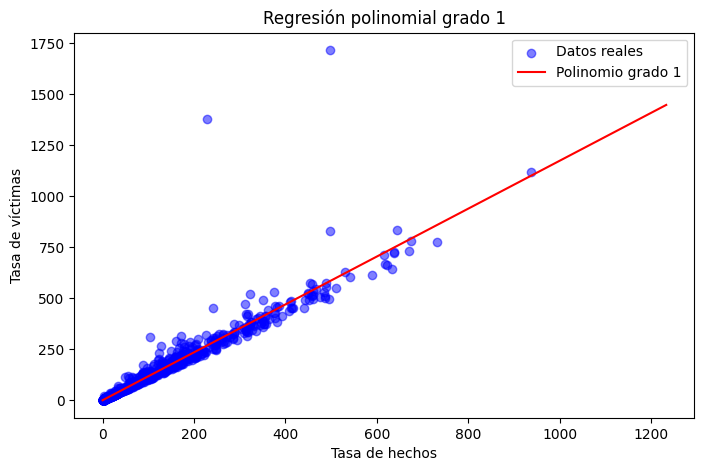

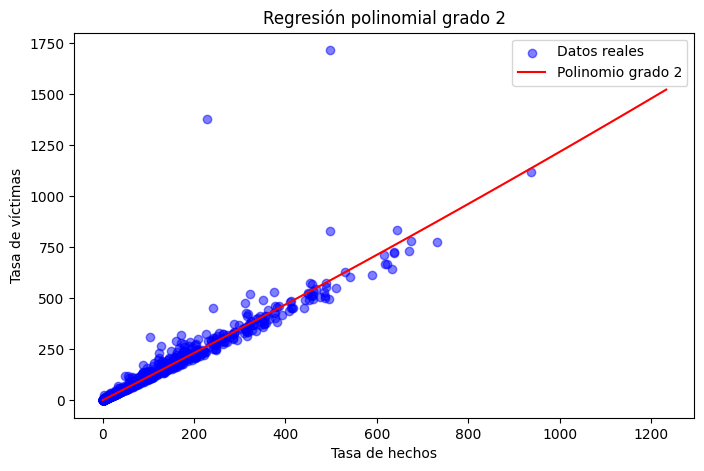

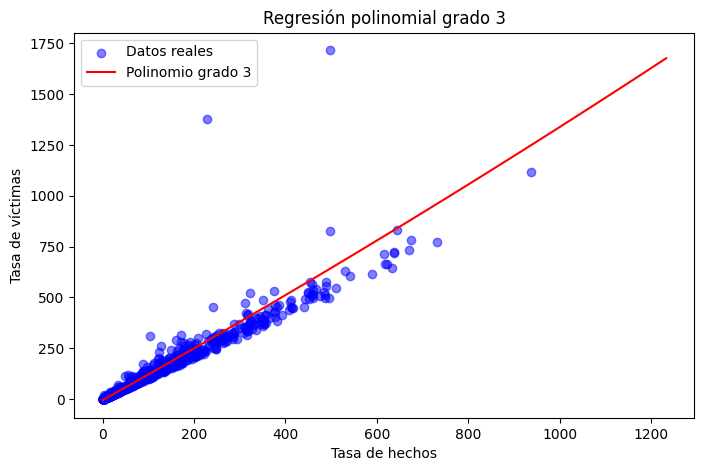

Grado 1: MSE = 2730.747, R2 = 0.895
Grado 2: MSE = 2495.385, R2 = 0.904
Grado 3: MSE = 2499.100, R2 = 0.904


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


X = df[['tasa_hechos','grupo_delito_id']]
y = df['tasa_victimas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grados = [1, 2, 3]
mse_list = []
r2_list = []

for grado in grados:
    model = make_pipeline(PolynomialFeatures(degree=grado, include_bias=False),
                          StandardScaler(),
                          LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_list.append(mse)
    r2_list.append(r2)

    # Graficar predicción vs 'tasa_hechos' manteniendo grupo_delito_id fijo
    plt.figure(figsize=(8,5))
    plt.scatter(X_test['tasa_hechos'], y_test, color='blue', alpha=0.5, label='Datos reales')

    # Crear rango para tasa_hechos
    x_range = np.linspace(X['tasa_hechos'].min(), X['tasa_hechos'].max(), 100)

    # Para cada valor de x_range crear un dataframe con grupo_delito_id promedio (o valor fijo)
    grupo_promedio = int(X['grupo_delito_id'].mean())
    X_range_df = pd.DataFrame({'tasa_hechos': x_range, 'grupo_delito_id': grupo_promedio})

    y_range_pred = model.predict(X_range_df)

    plt.plot(x_range, y_range_pred, color='red', label=f'Polinomio grado {grado}')
    plt.xlabel('Tasa de hechos')
    plt.ylabel('Tasa de víctimas')
    plt.title(f'Regresión polinomial grado {grado}')
    plt.legend()
    plt.show()

for i, grado in enumerate(grados):
    print(f"Grado {grado}: MSE = {mse_list[i]:.3f}, R2 = {r2_list[i]:.3f}")


Por el desempeño de los modelos, podemos decir que si bien el R^2 da alrededor del 0.9, tenemos al alto MSE. Por lo que consideramos que aumentar la flixiblidad y complejidad, no vale la pena en este caso.

## Anexo

* Se realizo cambios en la limpieza como agregar columnas para que la matriz de correlacion, identifique las categorias como numericas.
* Grupo_delito_id : se agrupo los codigos_delitos que contenia el dataset.
  * 1 : Homicidios
  * 2 : Lesiones
  * 3 : Delitos Sexuales
  * 9 : Delitos contra la libertad
  * 10 : Accidentes Viales

* Se cambio el rango del año del dataset ya que primero se habia fija desde 2017 a 2023 . Luego se encontro que a partir de 2019 surguieron nuevos tipos de delitos como categoria por lo que entre 2017 a 2019 aparecieron un numero considerado de NAN en la columna que identifica el tipo de delito. Por lo tanto, el analisis de esta entrega se realizo con los datos de 2019 a 2023.
